## Описание проекта. 
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Этапы: 

#### Часть 1. Приоритизация гипотез. 

1) Приоритизация гипотез через фреймворк ICE. 

2) Приоритизация гипотез через фреймворк RICE. 

#### Часть 2. Анализ A/B-теста. 

1) Построение графика кумулятивной выручки по группам. 

2) Построение графика кумулятивного среднего чека по группам. 

3) Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

4) Построение графика кумулятивного среднего количества заказов на посетителя по группам. 

5) Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

6) Построение точечного графика количества заказов по пользователям. 

7) Расчет 95-го и 99-го перцентилей количества заказов на пользователя. 

8) Построение точечного графика стоимостей заказов.

9) Расчет 95-го и 99-го перцентилей стоимости заказов. 

10) Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

11) Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

12) Расчет статистическую значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

13) Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. 

#### Вывод.

#### Импорт библиотек и загрузка данных.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np 

In [2]:
data = pd.read_csv() 
orders = pd.read_csv() 
visitors = pd.read_csv()

In [3]:
display(data) 
orders.info() 
visitors.info()

print(orders.duplicated().sum()) 
print(orders.isna().sum()) 
print(visitors.duplicated().sum()) 
print(visitors.isna().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
0
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
0
date        0
group       0
visitors    0
dtype: int64


Данные загружены, пропусков и дубликатов в данных не обнаружено.

#### Приоритизация гипотез при помощи фреймворка ICE.

In [4]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
data['ICE'] = (data['Impact']*data['Confidence'])/data['Efforts'] 
display(data[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Приоритизация гипотез при помощи фреймворка RICE.

In [5]:
data['RICE'] = (data['Reach']*data['Impact']*data['Confidence'])/data['Efforts'] 
print(data[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                                                                                     Hypothesis   RICE
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  112.0
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   56.0
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   40.0
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   40.0
8                                                       Запустить акцию, дающую скидку на товар в день рождения   16.2
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар    9.0
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов    4.0
5                      Добавить страницу отзывов

##### При использовании фреймворка ICE на первых местах оказались гипотезы 
* Запустить акцию, дающую скидку на товар в день рождения	16.200000
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	13.333333
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	11.200000 
При применении фреймворка ICE на первых 3 местах гипотезы: 
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  112.0
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   56.0
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   40.0 

Различие вызвано тем, что фреймворк RICE при расчетах учитывает охват пользователей (Reach). У гипотез 7 и 2 охват больше, чем у гипотез 8 и 0, поэтому они оказались в приоритете при расчете через RICE.

In [6]:
display(orders.head()) 
display(visitors.head())


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
#display(orders['visitorId'].nunique())
group_a = orders[orders['group']=='A'] 
group_b = orders[orders['group']=='B'] 
common = group_a.merge(group_b, on = ['visitorId']) 
common['visitorId'].nunique() 
common_users = common['visitorId'].unique() 
display(common_users)
orders = orders.query('visitorId not in @common_users') 
display(orders['visitorId'].nunique()) 

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295])

973

Всего 1031 уникальных пользователя, 58 пользователей попали в обе группы. Это около 6% пользователей. Удалим их, чтобы не искажать результаты теста. В итоге остаются 973 пользователя. 

#### Построение графика кумулятивной выручки по группам.

In [8]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [9]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [10]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 
print(cumulativeData['date'].min()) 
print(cumulativeData['date'].max())

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845
2019-08-01
2019-08-31


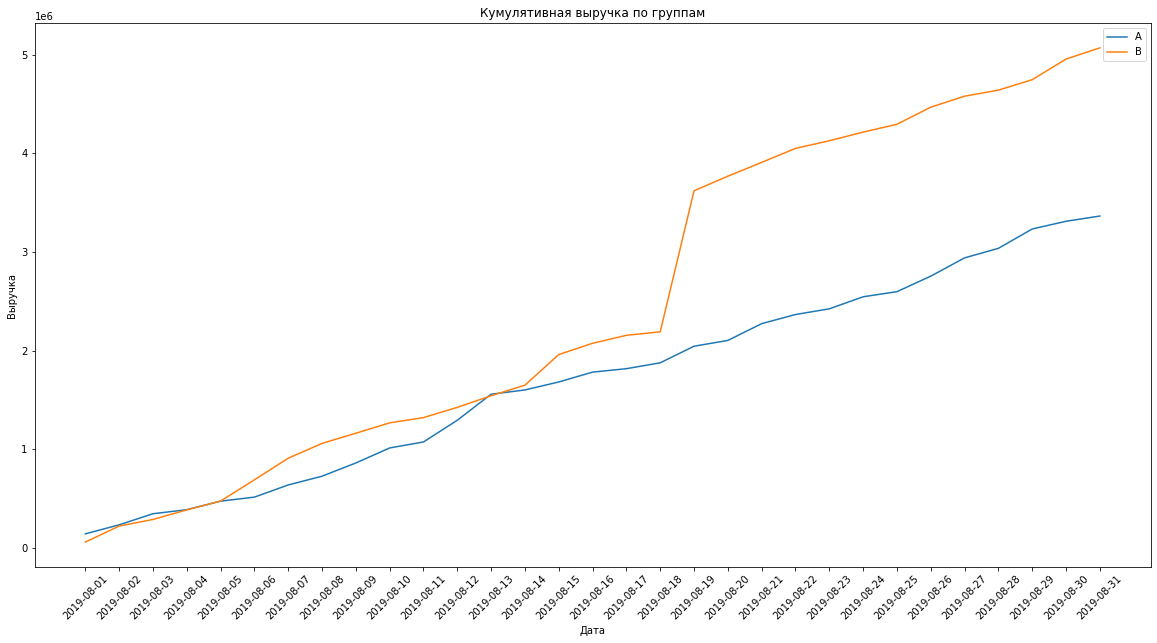

In [12]:
import matplotlib.pyplot as plt

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt. figure(figsize=(20, 10))
plt.title('Кумулятивная выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45) 
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend()
plt.show()

Выручка стабильно увеличивается на всем протяжении теста. У группы B в определенный момент она резко возрастает, и это не разовый всплеск, после резкого увеличения она не падает, а продолжает расти.

#### Построение графика кумулятивного среднего чека по группам.

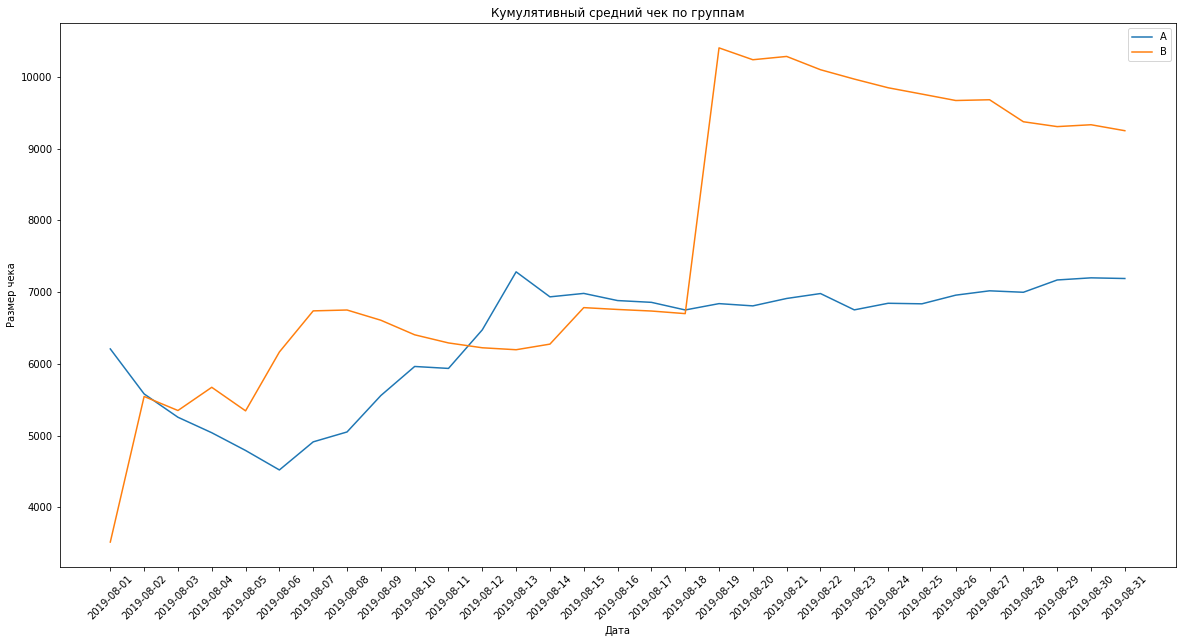

In [13]:
plt. figure(figsize=(20, 10))
plt.title('Кумулятивный средний чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Размер чека")
plt.legend() 
plt.show()

Средний чек растет у обеих групп, у группы B он большую часть времени выше, чем у группы A. В определенный момент происходит резкий рост показателя у группы B. Это может быть связано с аномалиями в данных.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

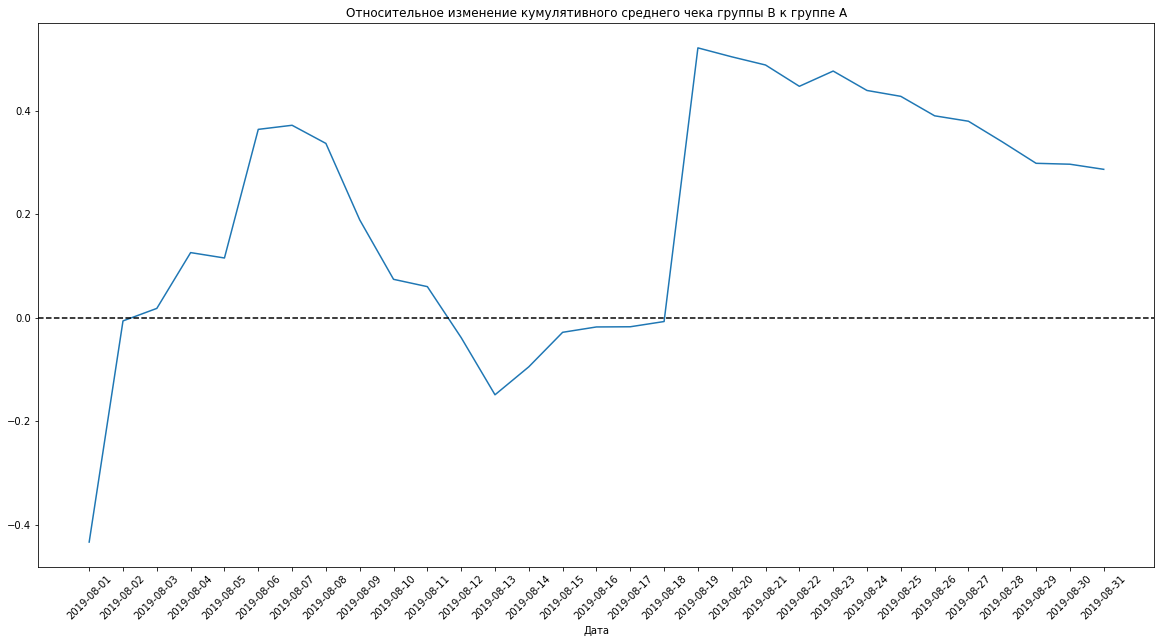

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt. figure(figsize=(20, 10))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Дата")
plt.show()

Показатели кумулятивного среднего среднего чека на протяжении эксперимента резко падают и растут. Это может быть вызвано аномалиями, либо обычными циклами внутри месяца (в начале и середине месяца люди получают авансы и премии, отсюда резки рост трат в эти периоды, а затем падение размера чека к концу двухнедельного цикла).

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

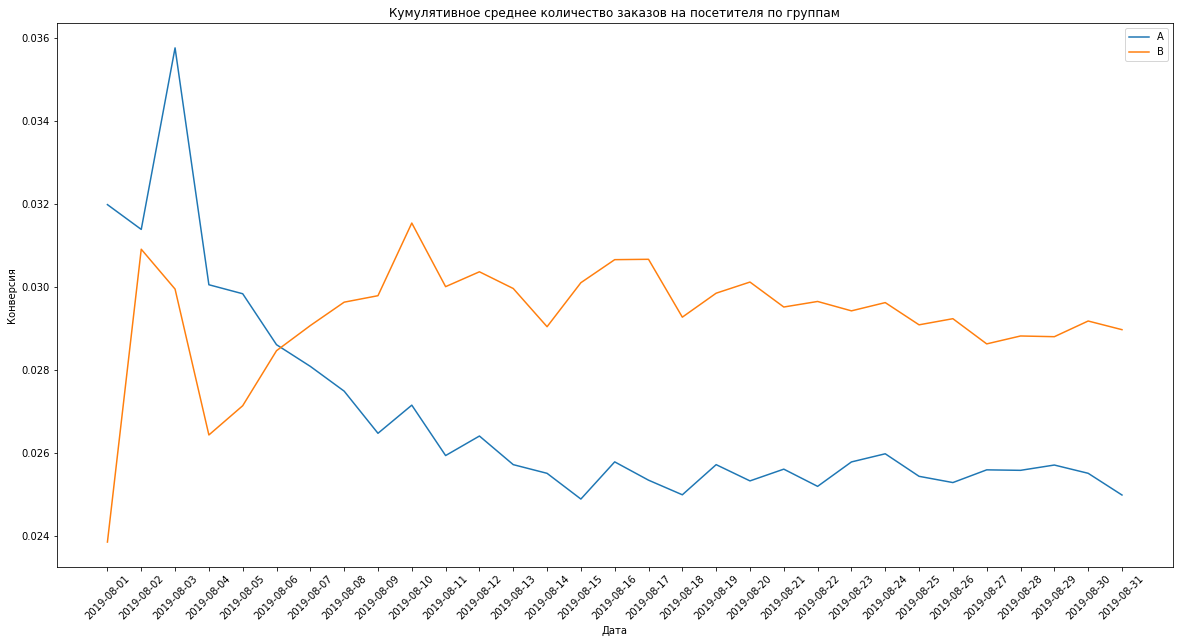

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt. figure(figsize=(20, 10))
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend() 
plt.show()

У группы B на протяжении всего эксперимента показатель среднего количества заказов на посетителя выше, чем у группы A.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

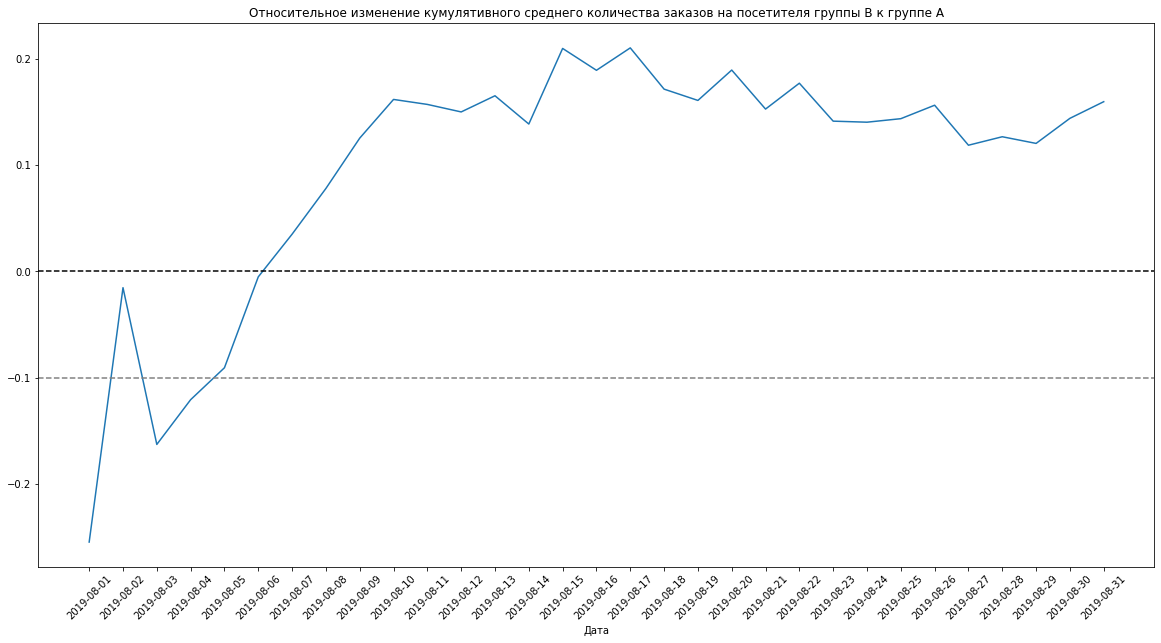

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,10))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--') 
plt.xlabel("Дата")
plt.xticks(rotation=45) 
plt.show()

Среднее количество заказов на посетителя у группы B на протяжении эксперименты выше, чем у посетителя группы A.

#### Точечный график количества заказов по пользователям

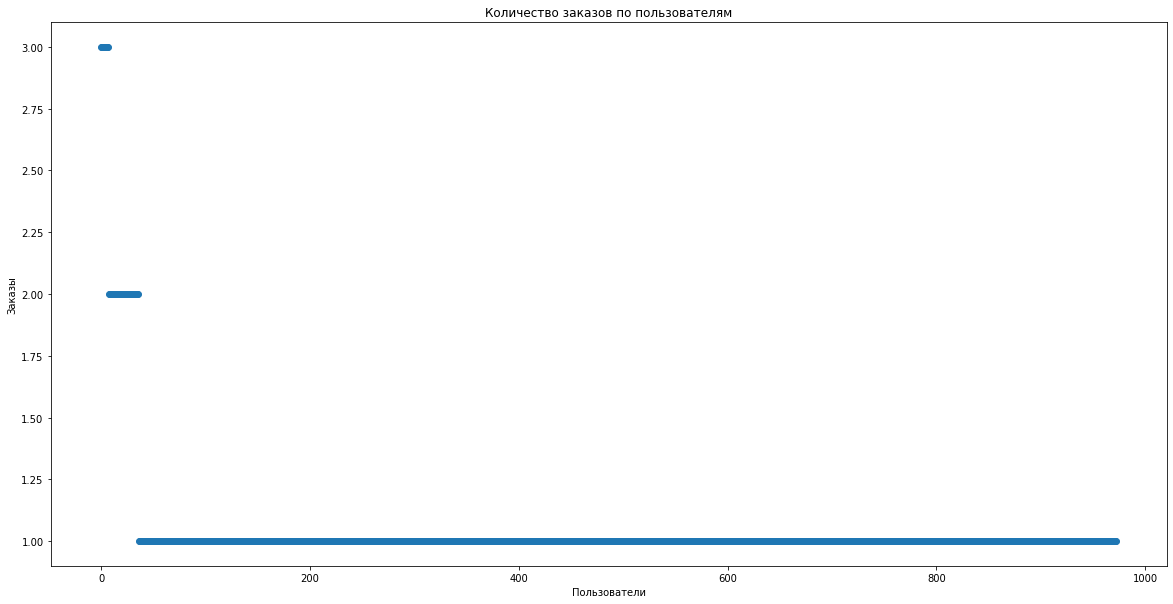

In [17]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders'] 
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.figure(figsize=(20,10))
plt.title('Количество заказов по пользователям')
plt.xlabel("Пользователи")
plt.ylabel("Заказы")
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Судя по графику, большая часть пользователей совершает 1 заказ, небольшое количество пользователей делают 2 заказа. Больше 2х заказов делает незначительная часть посетителей.

#### Расчет 95-го и 99-го перцентилей количества заказов на пользователя.

In [18]:
import numpy as np
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


95-й процентиль - 1 заказ 
99-й процентиль - 2 заказа. 
Только 5% пользователей делают более 1 заказа.

#### Точечный график стоимостей заказов.

(0.0, 1200.0, 0.0, 200000.0)

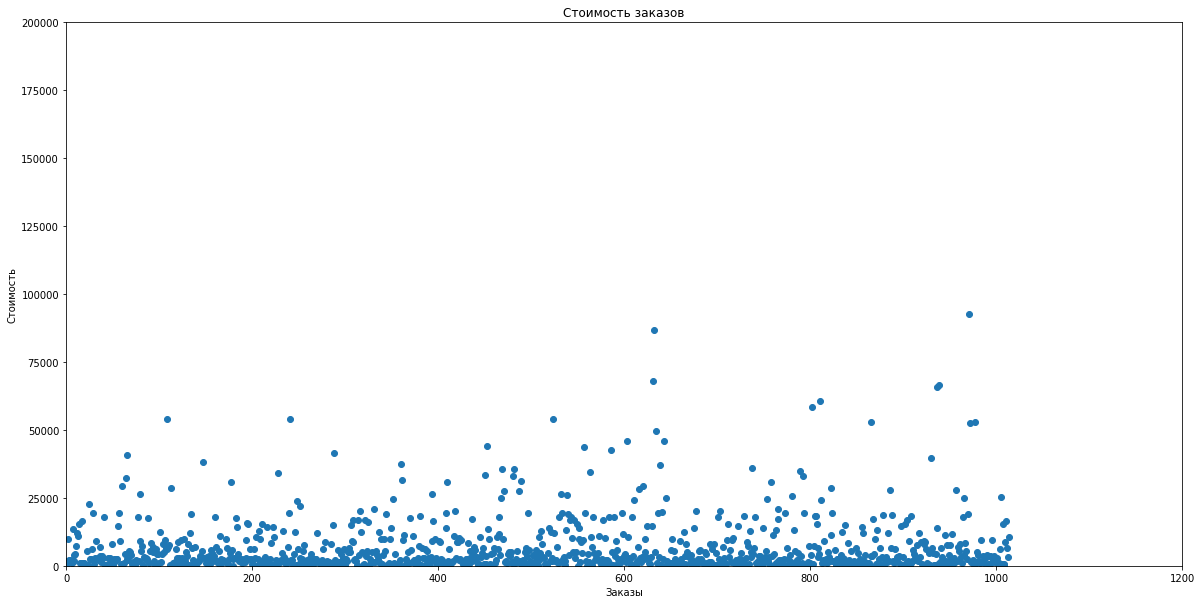

In [19]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,10)) 
plt.title('Стоимость заказов')
plt.scatter(x_values, orders['revenue']) 
plt.xlabel("Заказы")
plt.ylabel("Стоимость")
plt.axis([0, 1200, 0, 200000]) 

Согласно графику стоимость большей части заказов не превышает 25 000. 

#### Расчет 95-го и 99-го перцентилей стоимости заказов

In [20]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


При расчете выяснили, что стоимость 95% заказов находится в пределах 26 785.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы: 
H0 - разницы в среднем количестве заказов на посетителя между группами нет 
H1 - разница в среднем количестве заказов на посетителя между группами есть

In [21]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [22]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [23]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18291, dtype: int64

In [24]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
0.160


По "сырым" данным p-value = 0.01, что меньше уровня значимости 0.05. Значит нулевую гипотезу отвергаем, разница между группами в среднем количестве заказов на посетителя есть.
Разница между показателями группы А и B - 16% в пользу группы B.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

In [26]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
0.287


Сформулируем гипотезы: 
H0 - разницы в среднем чеке заказа между группами нет 
H1 - разница в среднем чеке заказа между группами есть.
P-value = 0.829, что значительно выше уровня значимости 0.05, что говорит о том, что не стоит отвергать нулевую гипотезу. При этом наблюдаем различие в 28%, что может быть вызвано тем, что в "сырых" данных есть выбросы, влияющие на результат подсчетов.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
86


#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [29]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.016
0.174


 Сформулируем гипотезы: 
 H0 - разницы в среднем количестве заказов на посетителя между группами нет 
 H1 - разница в среднем количестве заказов на посетителя между группами есть.
По очищенным данным p-value - 0.016, что меньше уровня значимости 0.05, что говорит о том, что можно отклонить нулевую гипотезу. Разница в среднем количестве заказов 17%, это очень значительный показатель.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [30]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
 "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.727
-0.034


Сформулируем гипотезы: 
Сформулируем гипотезы: 
H0 - разницы в среднем чеке заказа между группами нет 
H1 - разница в среднем чеке заказа между группами есть.
P-value по разнице в среднем чеке для "очищенных" данных = 0.727, что больше уровня значимости в 0.05. Соответственно, нулевую гипотезу отвергнуть не можем. Наблюдаем "проигрыш" группы B в 3%, однако он не является статистически значимым. 

### Вывод.
Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест. 

Тест можно прекратить. Мы не выявили разницы в среднем чеке на пользователя, однако зафиксировали разницу в среднем количестве заказов на пользователя. Победила группа B c перевесом в 17%.